# Create a 3D model of a Permo-Carboniferous Trough (PCT)

Based on two seismic sections from the NAGRA report [NAGRA NAB 14-17](https://www.nagra.ch/data/documents/database/dokumente/$default/Default%20Folder/Publikationen/NABs%202004%20-%202015/d_nab14-017.pdf), we extracted interface and orientation points for lithological units and faults.  

The lithological units comprise the permo-carboniferous filling (divided in three stages based on the report results), Mesozoic, Tertiary, and Quaternary strata, as well as the Palaeozoic crystalline basement rocks.

In [1]:
# import some libraries
import sys, os
sys.path.append(r'../../gempy/')
#sys.path.append(r'/Users/nijan/Documents/git/gempy/')
#import seaborn as sns
import matplotlib.pyplot as plt
import gempy as gp
#%matplotlib inline

#import numpy as np
import pandas as pd

Active grids: ['regular']
Active grids: ['regular' 'topography']


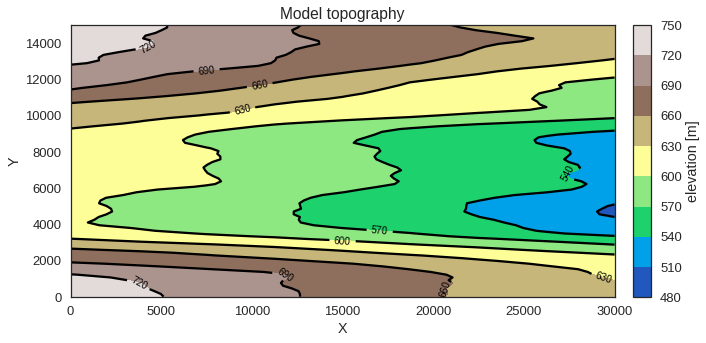

In [10]:
# Import data
# Create a model instance
geo_model = gp.create_model('Permo_Carb_Trough')

# Initialize the model, set dimension and load interface and orientation data
gp.init_data(geo_model, [0, 30000., 0, 15000., -7000, 1000.], [100, 9, 100],
                         path_o = '../data/leu2008/both_lines82and6_foliations_90_270.csv',
                         path_i = '../data/leu2008/both_lines82and6_interfaces.csv', default_values=False);
geo_model.set_topography(source='random', d_z=np.array([300,850]), fd=1.5);

In [11]:
section_dict = {'section1':([0,2000],[30000,2000],[200,200]),
               'section2':([0,7000],[30000,7000],[200,200]),
               'section3':([0,12000],[30000,12000],[200,200]),} #p1,p2,resolution
geo_model.grid.create_section_grid(section_dict)


,start,stop,resolution,dist
section1,"[0, 2000]","[30000, 2000]","[200, 200]",30000.0
section2,"[0, 7000]","[30000, 7000]","[200, 200]",30000.0
section3,"[0, 12000]","[30000, 12000]","[200, 200]",30000.0


In [12]:
# Check the table and if everything is allright
gp.get_data(geo_model, 'surface_points').head()

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
0,10221.66646,5000,-441.42848,0.412689,0.43558,0.541379,Fault2,Default series,1,1,0.000002
1,10421.66646,5000,-1534.28563,0.416376,0.43558,0.521233,Fault2,Default series,1,1,0.000002
2,10788.33313,5000,-2712.85706,0.423135,0.43558,0.499507,Fault2,Default series,1,1,0.000002
3,11321.66646,5000,-3762.85706,0.432967,0.43558,0.480152,Fault2,Default series,1,1,0.000002
4,12021.66646,5000,-5027.14277,0.445871,0.43558,0.456846,Fault2,Default series,1,1,0.000002


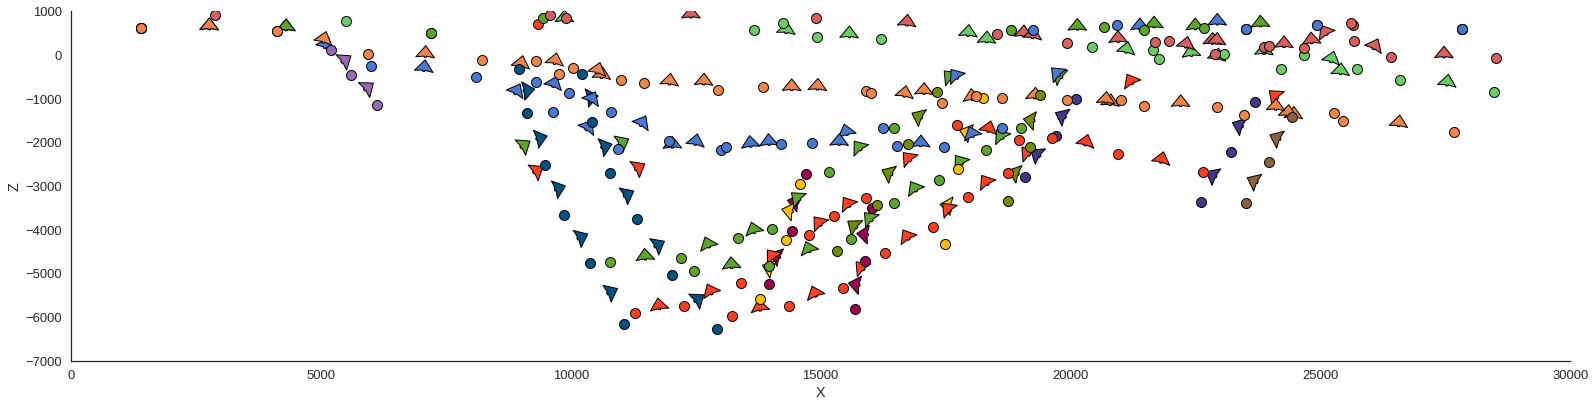

In [13]:
# Have a visual inspection of the data and if it looks relatively ok
import matplotlib.pyplot as plt
gp.plot.plot_data(geo_model, direction='y')

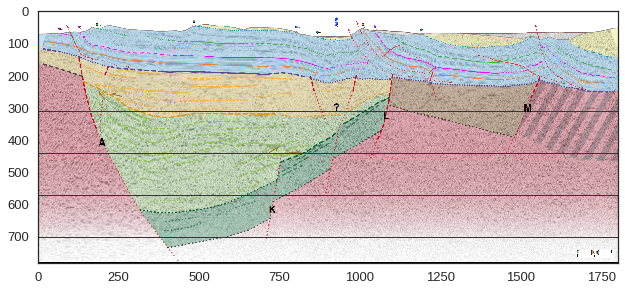

In [14]:
# for comparison, an interpretation
import matplotlib.image as mimg
img = mimg.imread('../imgs/line11-NS-06.png')
plt.imshow(img)

## Characteristics  
Main features of the model is the asymetric graben system, with the major fault (denoted with **A**), and the graben fill, which is not present beyond the graben shoulders. This, as well as the stop of major faults beneath the mesozoic units (blue units) are important considerations for the modelling process.  
These could be caught, for instance, in likelihood functions if we model the PCT as a Bayesian inference problem.

In [15]:
# Assign formations to series
gp.map_series_to_surfaces(geo_model,
                         {"Fault7_series": 'Fault7',
                          "Fault6_series": 'Fault6',
                          "Fault2_series": 'Fault2',
                          "Fault5_series": 'Fault5',
                          "Fault1_series": 'Fault1',
                         "Fault3_series": 'Fault3',
                         "Fault4_series": 'Fault4',
                         "Post_tectonic_series": ('Mesozoic', 'Tertiary', 'Quaternary'),
                         "Syn_tectonic_series2": 'Upper-filling',
                         "Syn_tectonic_series1": 'Middle-filling',
                         "Pre_tectonic_series": 'Lower-filling'},
                         remove_unused_series=True)
geo_model.surfaces

,surface,series,order_surfaces,isActive,color,id
12,Fault7,Fault7_series,1,True,#8c613c,1
4,Fault6,Fault6_series,1,True,#443988,2
0,Fault2,Fault2_series,1,True,#015482,3
3,Fault5,Fault5_series,1,True,#728f02,4
11,Fault1,Fault1_series,1,True,#956cb4,5
1,Fault3,Fault3_series,1,True,#9f0052,6
2,Fault4,Fault4_series,1,True,#ffbe00,7
8,Mesozoic,Post_tectonic_series,1,True,#ee854a,8
9,Tertiary,Post_tectonic_series,2,True,#6acc64,9
10,Quaternary,Post_tectonic_series,3,True,#d65f5f,10


In [16]:
# Set Faults
geo_model.set_is_fault(['Fault1_series','Fault7_series','Fault6_series',
                        'Fault2_series', 'Fault5_series', 'Fault3_series', 'Fault4_series']);
geo_model.set_is_finite_fault(series_fault=['Fault1_series', 'Fault7_series', 'Fault6_series', 
                                            'Fault5_series', 'Fault3_series', 'Fault4_series'],
                              toggle=True)

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Fault7_series,True,True
Fault6_series,True,True
Fault2_series,True,False
Fault5_series,True,True
Fault1_series,True,True
Fault3_series,True,True
Fault4_series,True,True
Post_tectonic_series,False,False
Syn_tectonic_series2,False,False
Syn_tectonic_series1,False,False


In [17]:
# table of fault relations
geo_model.faults.faults_relations_df

,Fault7_series,Fault6_series,Fault2_series,Fault5_series,Fault1_series,Fault3_series,Fault4_series,Post_tectonic_series,Syn_tectonic_series2,Syn_tectonic_series1,Pre_tectonic_series,Basement
Fault7_series,False,False,False,False,False,False,False,True,True,True,True,True
Fault6_series,False,False,False,False,False,False,False,True,True,True,True,True
Fault2_series,False,False,False,False,False,False,False,True,True,True,True,True
Fault5_series,False,False,False,False,False,False,False,True,True,True,True,True
Fault1_series,False,False,False,False,False,False,False,True,True,True,True,True
Fault3_series,False,False,False,False,False,False,False,True,True,True,True,True
Fault4_series,False,False,False,False,False,False,False,True,True,True,True,True
Post_tectonic_series,False,False,False,False,False,False,False,False,False,False,False,False
Syn_tectonic_series2,False,False,False,False,False,False,False,False,False,False,False,False
Syn_tectonic_series1,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
gp.activate_interactive_df(geo_model)

In [19]:
# use this interactive table to check or un-check fault relations
geo_model.qi.get('faults_relations')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [20]:
geo_model.faults.faults_relations_df

,Fault7_series,Fault6_series,Fault2_series,Fault5_series,Fault1_series,Fault3_series,Fault4_series,Post_tectonic_series,Syn_tectonic_series2,Syn_tectonic_series1,Pre_tectonic_series,Basement
Fault7_series,False,False,False,False,False,False,False,False,True,True,True,True
Fault6_series,False,False,False,False,False,False,False,False,True,True,True,True
Fault2_series,False,False,False,False,False,False,False,True,True,True,True,True
Fault5_series,False,False,False,False,False,False,False,True,True,True,True,True
Fault1_series,False,False,False,False,False,False,False,False,True,True,True,True
Fault3_series,False,False,False,False,False,False,False,False,True,True,True,True
Fault4_series,False,False,False,False,False,False,False,False,True,True,True,True
Post_tectonic_series,False,False,False,False,False,False,False,False,False,False,False,False
Syn_tectonic_series2,False,False,False,False,False,False,False,False,False,False,False,False
Syn_tectonic_series1,False,False,False,False,False,False,False,False,False,False,False,False


## Creating the model
Now that we set the parameters and fault relations, it is time to start the modeling process:

In [21]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  7
Compilation Done!
Kriging values: 
                                                values
range                                         34481.9
$C_o$                                     2.83095e+07
drift equations  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [22]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

When plotting the scalar field, we actually see what the gradients (the orientation triangles) look like for the different units / faults. 

In [23]:
geo_model.surfaces

,surface,series,order_surfaces,isActive,color,id
12,Fault7,Fault7_series,1,True,#527682,1
4,Fault6,Fault6_series,1,True,#527682,2
0,Fault2,Fault2_series,1,True,#527682,3
3,Fault5,Fault5_series,1,True,#527682,4
11,Fault1,Fault1_series,1,True,#527682,5
1,Fault3,Fault3_series,1,True,#527682,6
2,Fault4,Fault4_series,1,True,#527682,7
10,Quaternary,Post_tectonic_series,1,True,#d65f5f,8
9,Tertiary,Post_tectonic_series,2,True,#6acc64,9
8,Mesozoic,Post_tectonic_series,3,True,#ee854a,10


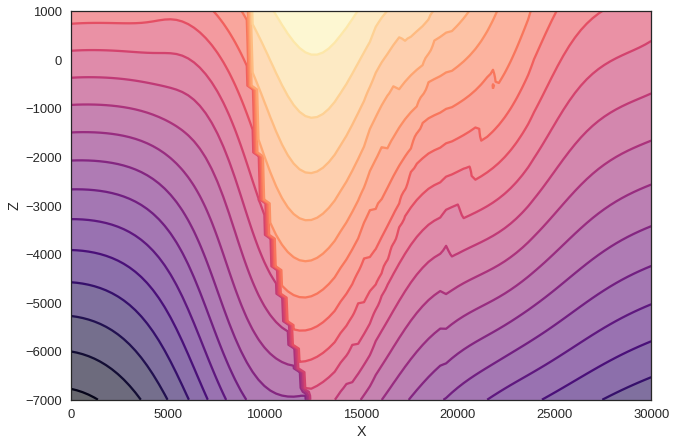

In [25]:
gp.plot.plot_scalar_field(geo_model, cell_number=5, series=10)

A more *geological* visual inspection is provided with a `plot_section` method:

p1 [0.0, 8333.333333333334] p2 [30000.0, 8333.333333333334]


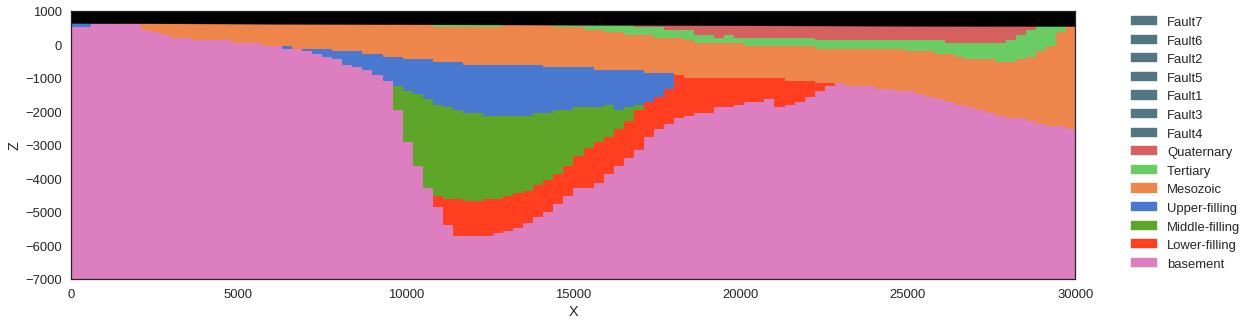

In [26]:
%matplotlib inline
fig = plt.figure(figsize=[18,12])
#ax = fig.ad
gp.plot.plot_section(geo_model, cell_number=5, direction='y', show_faults=False,
                     show_data=False, show_topo=True, interpolation='none', ve=1)

#fig.savefig('save_cs_fine_resolution2.png', dpi=300, bbox_inches='tight', transparent=True)

In [66]:
geo_model.solutions.lith_block

array([14., 14., 14., ...,  8.,  8.,  8.])

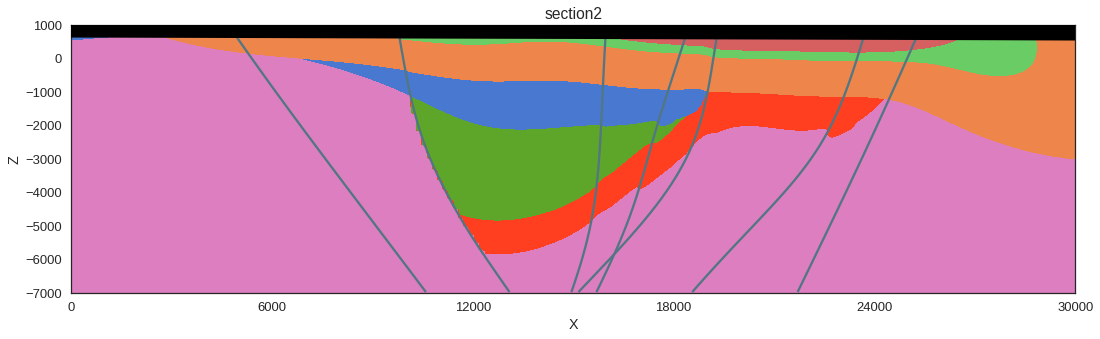

In [27]:
fig = plt.figure(figsize=[18,12])
gp.plot.plot_section_by_name(geo_model, 'section2', show_data=False, show_faults=False)
#fig.savefig('section2_fine3.png', dpi=300, bbox_inches='tight')

## Topology

In [28]:
from gempy.assets import topology as tp

In [34]:
# complete model
# edges, centroids = tp.compute_topology(geo_model)
edges, centroids = tp.compute_topology(geo_model, cell_number=5, voxel_threshold=10, direction="y")

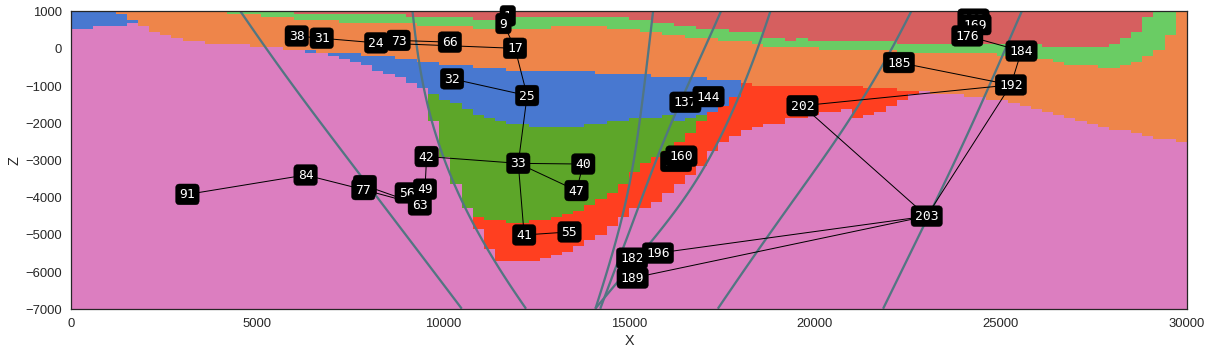

In [35]:
fig = plt.figure(figsize=[20,12])
gp.plot.plot_section(geo_model, 5, show_legend=False)
gp.plot.plot_topology(geo_model, edges, centroids, direction="y")

In [27]:
M = tp.get_adjacency_matrix(geo_model, edges, centroids)
print(M)

IndexError: index 145 is out of bounds for axis 0 with size 56

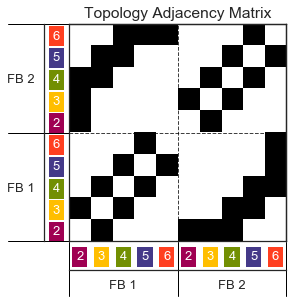

In [295]:
tp.plot_adjacency_matrix(geo_model, M)

## Write export to MOOSE

In [37]:
# old syntax
def export_MOOSE(geo_model):
    nx, ny, nz = geo_model.grid.regular_grid.resolution
    xmin, xmax, ymin, ymax, zmin, zmax = geo_model.solutions.grid.extent
    
    ids = np.round(geo_model.solutions.lith_block).astype(int)
    
    liths = ids.reshape((nx, ny, nz))
    liths = liths.flatten('F')
    
    idstring = '\n  '.join(map(str, liths))
    sids = dict(zip(geo_model.surfaces.df['surface'], geo_model.surfaces.df['id']))
    
    surfs = list(sids.keys())
    uids = list(sids.values())
    surfs_string = ' '.join(surfs)
    ids_string = ' '.join(map(str, uids))
    
    fstring = f"""[Mesh]
      type = GeneratedMesh
      dim = 3
      nx = {nz}
      ny = {ny}
      nz = {nx}
      xmin = {zmin}
      xmax = {zmax}
      yim = {ymin}
      ymax = {ymax}
      zmin = {xmin}
      zmax = {xmax}
      #block_id = '{ids_string}'
      #block_name = '{surfs_string}'
      []
      
    [MeshModifiers]
      [./subdomains]
        type = AssignElementSubdomainID
        subdomain_ids = '{idstring}'
      [../]
    []
    """
    return fstring, idstring
    
    
    
    

In [37]:
# new syntax
def export_MOOSE(geo_model, path=None):
    nx, ny, nz = geo_model.grid.regular_grid.resolution
    xmin, xmax, ymin, ymax, zmin, zmax = geo_model.solutions.grid.extent
    
    ids = np.round(geo_model.solutions.lith_block,0)
    ids = ids.astype(int)
    
    liths = ids.reshape((nx, ny, nz))
    liths = liths.flatten('F')

    idstring = '\n  '.join(map(str, liths))
    sids = dict(zip(geo_model.surfaces.df['surface'], geo_model.surfaces.df['id']))
    
    surfs = list(sids.keys())
    uids = list(sids.values())
    surfs_string = ' '.join(surfs)
    ids_string = ' '.join(map(str, uids))
    
    fstring = f"""[MeshGenerators]
  [./gmg]
  type = GeneratedMeshGenerator
  dim = 3
  nx = {nx}
  ny = {ny}
  nz = {nz}
  xmin = {xmin}
  xmax = {xmax}
  yim = {ymin}
  ymax = {ymax}
  zmin = {zmin}
  zmax = {zmax}
  #block_id = '{ids_string}'
  #block_name = '{surfs_string}'
  [../]
  
  [./subdomains]
    type = ElementSubdomainIDGenerator
    input = gmg
    subdomain_ids = '{idstring}'
  [../]
[]

[Mesh]
  type = MeshGeneratorMesh
[]
"""
    if not path:
        path = './geo_model_units'
    f = open(path+'_moose_input.i', 'w+')
    
    f.write(fstring)
    f.close()
    return fstring, idstring
    
    
    
    

In [35]:
export_MOOSE(geo_model)

In [38]:
test, ids = export_MOOSE(geo_model)

In [39]:
f = open('test_moose_f_syntax_20191025.i', 'w+')

In [40]:
f.write(test)

740425

In [41]:
f.close()

In [42]:
ver , sim = gp.get_surfaces(geo_model)

In [44]:
gp.plot.export_to_vtk?

In [45]:
gp.plot.export_to_vtk(geo_model, path='../', name='3D_pct_test', voxels=ver, surfaces=sim)

In [35]:
pauli = np.empty(0)
pauli

array([], dtype=float64)

In [37]:
res = geo_model.grid.regular_grid.resolution

In [98]:
res[0]

30

In [99]:
liths = geo_model.solutions.lith_block.reshape(res[0], res[1], res[2])
liths2 = geo_model.solutions.lith_block.reshape(res).astype(int)

In [100]:
liths[29,45,52]

9.379439370296765

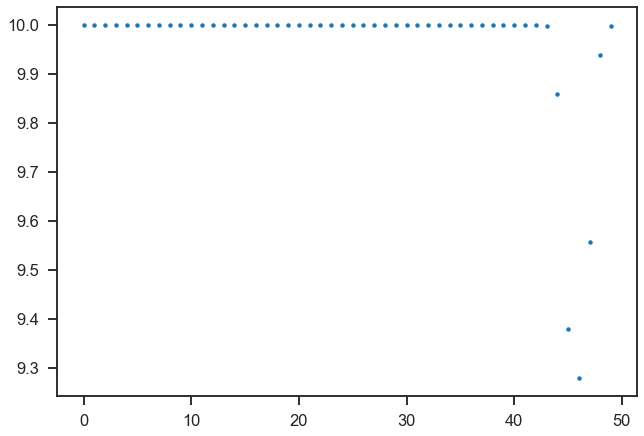

In [101]:
plt.plot(liths[29,:,52], '.')

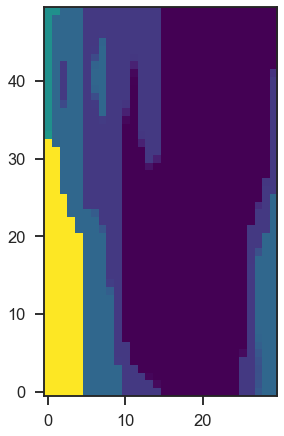

In [106]:
plt.imshow(liths[:,:,-1].T, cmap='viridis', origin="bottom")

In [51]:
np.round_(30.68, decimals=0)

31.0

In [ ]:
gp.utils.